# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:
y_train[333]

8

Check the actual image

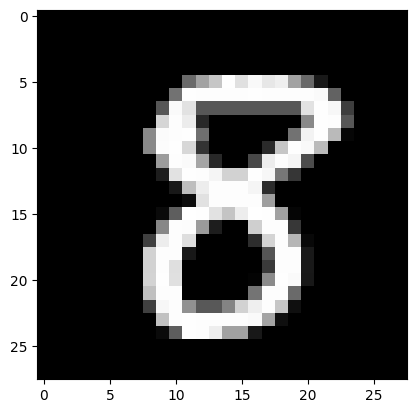

In [ ]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 4ms/step - loss: 0.5275 - accuracy: 0.8414 - val_loss: 0.2129 - val_accuracy: 0.9327
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2593 - accuracy: 0.9235 - val_loss: 0.1563 - val_accuracy: 0.9495
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2039 - accuracy: 0.9397 - val_loss: 0.1311 - val_accuracy: 0.9591
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1760 - accuracy: 0.9482 - val_loss: 0.1231 - val_accuracy: 0.9627
Epoch 5/30
469/469 [==============================] - 3s 5ms/step - loss: 0.1589 - accuracy: 0.9531 - val_loss: 0.1083 - val_accuracy: 0.9652
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1451 - accuracy: 0.9565 - val_loss: 0.1018 - val_accuracy: 0.9694
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1376 - accuracy: 0.9586 - val_loss: 0.0987 - val_accuracy: 0.9696
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09873481839895248
Test accuracy: 0.9757999777793884


Interpret the result

The trained model has good numbers as this can be seen in the results of the   test loss and accuracy, but we should not be assured just by looking at its test performance, we should still try to apply it to the validation data to check on how well does it really perform.

Plot the loss and accuracy

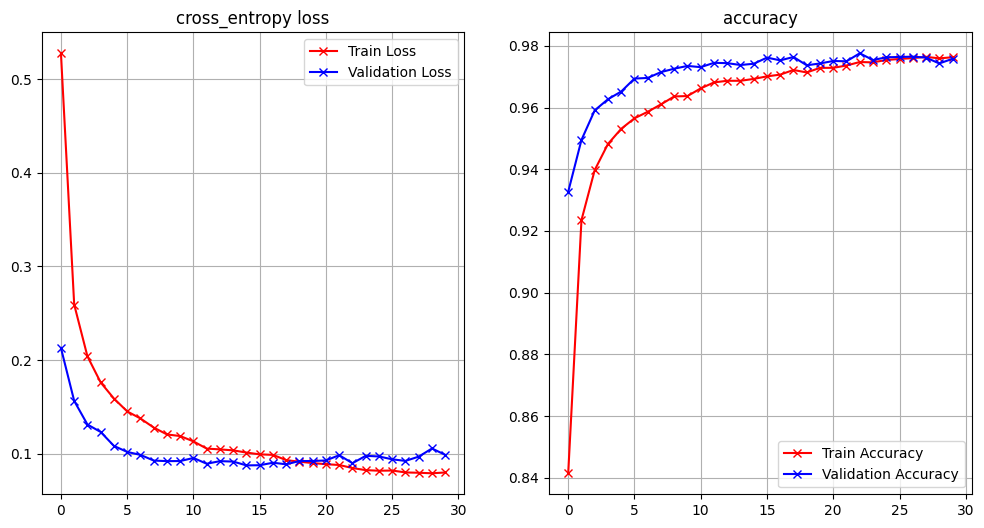

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

By examining this plot, the validation loss and accuracy are close to the train loss and accuracy, which can be a good indicator that the trained model has indeed good performance.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs, learning rate, batch size, and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
# Two hidden layers.
# First hidden layer of size 400 and second of size 300
# Dropout of .4 at each layer

model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
model_1.summary()
# This model has a total number of 437,310 parameters compared to the first model,
# this has a larger number of parameters being taken

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               120300    
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

learning_rate = .001
batch_size = 128
epochs = 20

model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3316 - accuracy: 0.8984 - val_loss: 0.1223 - val_accuracy: 0.9603
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1519 - accuracy: 0.9543 - val_loss: 0.0905 - val_accuracy: 0.9705
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1185 - accuracy: 0.9649 - val_loss: 0.0819 - val_accuracy: 0.9759
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1025 - accuracy: 0.9694 - val_loss: 0.0697 - val_accuracy: 0.9790
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0859 - accuracy: 0.9732 - val_loss: 0.0714 - val_accuracy: 0.9793
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0792 - accuracy: 0.9763 - val_loss: 0.0699 - val_accuracy: 0.9793
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0742 - accuracy: 0.9786 - val_loss: 0.0652 - val_accuracy: 0.9825

In [ ]:
# Use at least two regularization techniques and apply it to the new model (model_2)
from keras import regularizers

model_2 = Sequential()

# Let us use L2 and Early Stopping Regularizations
model_2.add(Dense(400, kernel_regularizer=regularizers.l2(0.01), activation="relu", input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

In [ ]:
model_2.summary()
# This model has the same number of parameters taken just like model_1

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 400)               314000    
                                                                 
 dropout_10 (Dropout)        (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               120300    
                                                                 
 dropout_11 (Dropout)        (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for your preferred epochs, learning rate, batch size, and optimizer

from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

earlystop= EarlyStopping(monitor='val_accuracy', patience=3)
# What this does is that it stops model training once possibility of overfitting
# or underfitting is detected

learning_rate = .00001
batch_size = 256
epochs = 40

model_2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])

history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[earlystop])

Epoch 1/40
235/235 [==============================] - 6s 21ms/step - loss: 2.1578 - accuracy: 0.8425 - val_loss: 0.6121 - val_accuracy: 0.9211
Epoch 2/40
235/235 [==============================] - 6s 24ms/step - loss: 0.6191 - accuracy: 0.9083 - val_loss: 0.5063 - val_accuracy: 0.9336
Epoch 3/40
235/235 [==============================] - 5s 20ms/step - loss: 0.5563 - accuracy: 0.9178 - val_loss: 0.4767 - val_accuracy: 0.9368
Epoch 4/40
235/235 [==============================] - 7s 30ms/step - loss: 0.5292 - accuracy: 0.9218 - val_loss: 0.4506 - val_accuracy: 0.9420
Epoch 5/40
235/235 [==============================] - 4s 19ms/step - loss: 0.5062 - accuracy: 0.9256 - val_loss: 0.4289 - val_accuracy: 0.9459
Epoch 6/40
235/235 [==============================] - 6s 24ms/step - loss: 0.4912 - accuracy: 0.9275 - val_loss: 0.4284 - val_accuracy: 0.9474
Epoch 7/40
235/235 [==============================] - 6s 24ms/step - loss: 0.4805 - accuracy: 0.9289 - val_loss: 0.4575 - val_accuracy: 0.9338

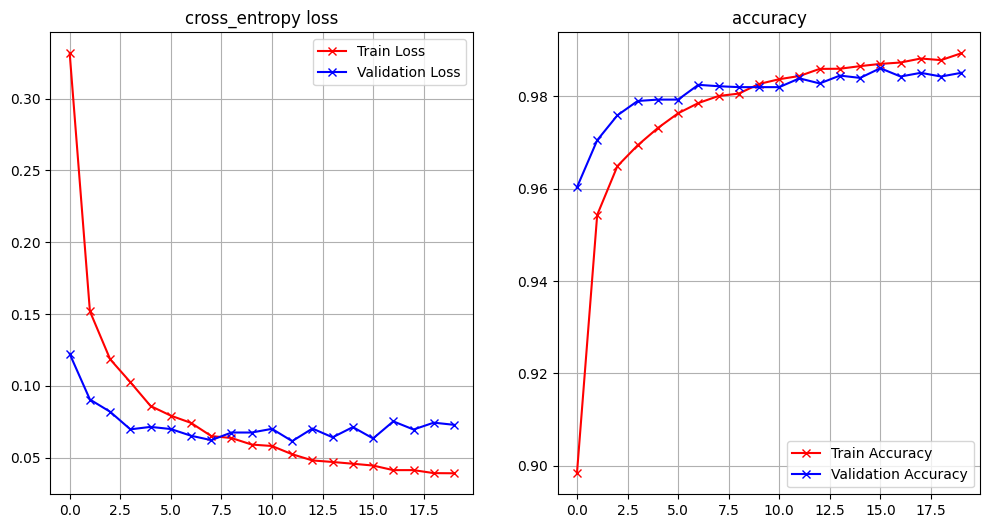

In [ ]:
plot_loss_accuracy(history_1)

This model may have hints of overfitting but not too much, as the train accuracy is higher than the validation accuracy.

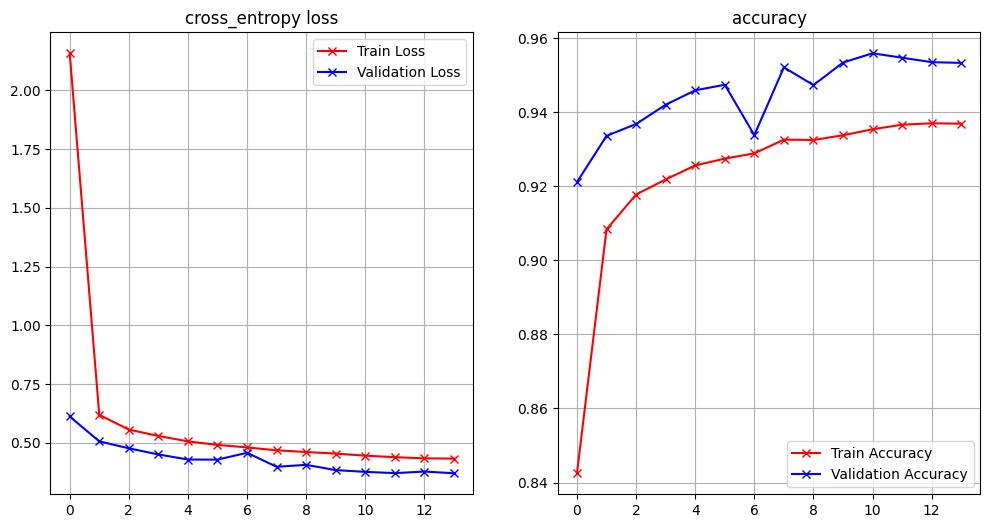

In [ ]:
plot_loss_accuracy(history_2)

Seeing the comparison between these two models, even if model_1 has a lower loss and higher accuracy, we were still able to achieve an accuracy of 95% in model_2. I think that 2 regularizations applied to model_2 affected its performance, but this is understandable as to prevent model overfitting by using the Early Stopping regularization.

#### Conclusion

It is in this hands-on activity where I get to slowly understand how regularization techniques is helpful in optimizing the performance and efficiency of model training. I noticed how different the ordinary model is compared to the regularized model. I enjoyed seeing how helpful the Early Stopping regularization technique is, as it is really helpful to prevent overfitting or underfitting, which is crucial for us as we try to achieve an efficient and stable machine/deep learning model.